In [2]:
import pandas as pd
import scanpy as sc
from pyannotables import tables
import numpy as np
import scipy as sp
import joblib
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

In [3]:
sc.set_figure_params(dpi=100)

In [4]:
import sys
from pathlib import Path

In [5]:
sys.path.append(str(Path.home() / 'Code/sctoolkit/'))

In [6]:
from sctoolkit.utils import sort_by_correlation

In [ ]:
%%time

lamdb = sc.read('lamdb-mac.h5ad')

In [16]:
main_lim = [
    
 'GSE131778', #: 'Artery (coronary, atherosclerotic lesions) [Wirka et al.]',   
 'GSE159677', #: 'Artery (atherosclerotic core plaques) [Alsaigh, et al.]',    
 'GSE156776', #: "Intestine (creeping fat, Crohn's) [Ha et al.]",
 'GSE140393', #: 'CNS (temporal lobe epilepsy) [Tome-Garcia et al.]',    
 'GSE128518', #: 'Adipose (omental) [Jaitin et al.]',
 'GSE117403', #: 'Prostate [Henry et al.]',    
 'GSE144085', #: 'Testis (spermatogonia) [Tan et al.]',
 'GSE153760', #: 'Skin (atopic dermatitis) [Rojahn et al.]',
 'GSE115469', #: 'Liver [MacParland]',    
 'GSE131685', #: 'Kidney [Liao et al.]',
 'GSE143704', #: 'Muscle (flexor hallucis longus) [De Micheli et al.]',
 'GSE143380', #: 'Ovary (Week 16) [Chitiashvili et al.]',
 'E-MTAB-6701', #: 'Placenta/Decidua',

 'GSE131886', #: 'Pancreas [Qadir et al.]',
 'Adipose_muus',
 'ENS',
 'Current study',
 'GSE150672', # Shalek lab skin
]

In [17]:
from tqdm.auto import tqdm
import GEOparse
import pandas as pd

metas = {}

for s in tqdm(main_lim):
    #print(s)
    try:
        gse = GEOparse.get_GEO(geo=s, destdir="/tmp", silent=True)
    except GEOparse.GEOparse.UnknownGEOTypeException:
        continue

    m = gse.metadata
    m = {k:(tuple(v) if len(v)>1 else v[0]) for k,v in m.items()}
    metas[s] = m


pd.options.display.max_columns = 100

meta = pd.DataFrame(metas).T
meta = meta[['title', 'summary', 'overall_design', 'submission_date', 'contributor', 'geo_accession', 'pubmed_id']]

  0%|          | 0/18 [00:00<?, ?it/s]

In [18]:
meta

,title,summary,overall_design,submission_date,contributor,geo_accession,pubmed_id
GSE131778,Single cell analysis of smooth muscle cell phe...,"In response to various stimuli, vascular smoot...",We performed single-cell RNAseq of cells from ...,May 25 2019,"(Robert,C,Wirka, Dhananjay,,Wagh, David,T,Paik...",GSE131778,31359001
GSE159677,Decoding the transcriptome of calcified athero...,Atherogenesis involves an interplay of inflamm...,Calcified atherosclerotic core (AC) plaques an...,Oct 20 2020,"(Tom,,Alsaigh, Doug,,Evans, David,,Frankel, Al...",GSE159677,NaN
GSE156776,Translocation of Viable Gut Microbiota to Mese...,A mysterious feature of Crohn’s disease (CD) i...,Single-cell RNA-seq analysis of stromal vascul...,Aug 24 2020,"(Connie,W,Ha, Anthony,,Martin, Gregory,D,Sepic...",GSE156776,32991841
GSE140393,Glia-specific nuclei isolation and single cell...,The role of human glia in many neurological di...,Analysis of cell-type specific transcriptome c...,Nov 14 2019,"(Nadejda,M,Tsankova, German,,Nudelman, Elena,,...",GSE140393,NaN
GSE128518,Lipid-associated macrophages control metabolic...,Immune cells residing in white adipose tissue ...,"(At age 8-9 weeks, for some mice the normal ch...",Mar 19 2019,"(Diego,A,Jaitin, Lorenz,,Adlung, Christoph,A,T...",GSE128518,31257031
GSE117403,Single Cell RNA-sequencing of cell types isola...,Single-cell RNA-sequencing was conducted on sp...,Fresh human prostate specimens were digested i...,Jul 19 2018,"(Douglas,W,Strand, Gervaise,H,Henry, Chad,M,Ve...",GSE117403,30566875
GSE144085,Transcriptome analysis reveals conditions for ...,Spermatogonial stem cells (SSCs) are essential...,Bulk RNAseq was performed on PLPPR3+ and KIT+ ...,Jan 22 2020,"(Kun,,Tan, Miles,F,Wilkinson)",GSE144085,32661178
GSE153760,Single-cell Transcriptomics Combined With Inte...,(Background: Atopic dermatitis (AD) is the mos...,(Comparison of skin cells obtained by skin suc...,Jul 03 2020,"(Thomas,B,Rojahn, Vera,,Vorstandlechner, Thoma...",GSE153760,"(32344053, 33717163)"
GSE115469,Dissecting the human liver cellular landscape ...,The liver is the largest solid organ in the bo...,Primary liver samples from 5 patients were use...,Jun 07 2018,"(Sonya,A,MacParland, Jeff,C,Liu, Gary,D,Bader,...",GSE115469,30348985
GSE131685,Single-cell RNA sequencing of human kidney,A comprehensive cellular anatomy of normal hum...,(Primary kidney samples from 3 patients were u...,May 23 2019,"(Jinling,,Liao, Zhenyuan,,Yu, Yang,,Chen, Chun...",GSE131685,"(31896769, 34722263)"


In [19]:
meta.to_excel('external_studies_LAM.xlsx', index=False)

In [20]:
len(main_lim)

18

In [21]:
', '.join(sorted(main_lim))

'Adipose_muus, Current study, E-MTAB-6701, ENS, GSE115469, GSE117403, GSE128518, GSE131685, GSE131778, GSE131886, GSE140393, GSE143380, GSE143704, GSE144085, GSE150672, GSE153760, GSE156776, GSE159677'

In [ ]:
lamdb_main = lamdb.copy()

In [ ]:
small_lamdb = lamdb_main[(lamdb_main.obs.lam_02 == 'LAM') & (lamdb_main.obs.study_name!='Current study')].copy()
small_lamdb

In [26]:
small_lamdb.obs.study_desc.cat.categories

Index(['Adipose (omental) [Jaitin et al.]', 'Adipose [Muus et al.]',
       'Artery (atherosclerotic lesions) [Wirka et al.]',
       'Artery (atherosclerotic plaques) [Alsaigh, et al.]',
       'CNS (temporal lobe epilepsy) [Tome-Garcia et al.]',
       'Decidua [Vento-Tormo et al.]', 'Intestine (ENS) [Drokhlyansky et al.]',
       'Intestine (creeping fat, Crohn's) [Ha et al.]', 'Kidney [Liao et al.]',
       'Liver [MacParland et al.]', 'Ovary (Week 16) [Chitiashvili et al.]',
       'Pancreas [Qadir et al.]', 'Placenta [Vento-Tormo et al.]',
       'Prostate [Henry et al.]',
       'Skeletal muscle (Left rectus abdominus) [De Micheli et al.]',
       'Skin (Acne) [Hughes et al.]', 'Skin (Leprosy) [Hughes et al.]',
       'Skin (atopic dermatitis) [Rojahn et al.]', 'Testis [Tan et al.]'],
      dtype='object')

In [27]:
small_lamdb.obs.study_desc.cat.reorder_categories([
    'Adipose (omental) [Jaitin et al.]',
    'Adipose [Muus et al.]',
    'Placenta [Vento-Tormo et al.]',
    'Intestine (creeping fat, Crohn\'s) [Ha et al.]',
    'Artery (atherosclerotic lesions) [Wirka et al.]',
    'Artery (atherosclerotic plaques) [Alsaigh, et al.]',
    
    'Skin (Acne) [Hughes et al.]',
    'Skin (Leprosy) [Hughes et al.]',    
    'Skin (atopic dermatitis) [Rojahn et al.]',    

    'Testis [Tan et al.]',
    'Kidney [Liao et al.]',    
    'Pancreas [Qadir et al.]',
    'Prostate [Henry et al.]',
    'CNS (temporal lobe epilepsy) [Tome-Garcia et al.]',
    'Decidua [Vento-Tormo et al.]',    
    'Liver [MacParland et al.]',
    'Ovary (Week 16) [Chitiashvili et al.]',
    'Skeletal muscle (Left rectus abdominus) [De Micheli et al.]',
    'Intestine (ENS) [Drokhlyansky et al.]',
], inplace=True)

/tmp/ipykernel_405023/3853996185.py:1: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.


In [32]:
genes = [
    'C1QA', 'CD68', 'TREM2', 'LGALS3', 'CD9', 'APOC1', 'APOE', 'SPP1', 'LIPA', 'FABP5', 'PLA2G7',
    'CTSB', 'CHIT1', 'CHI3L1', 
]

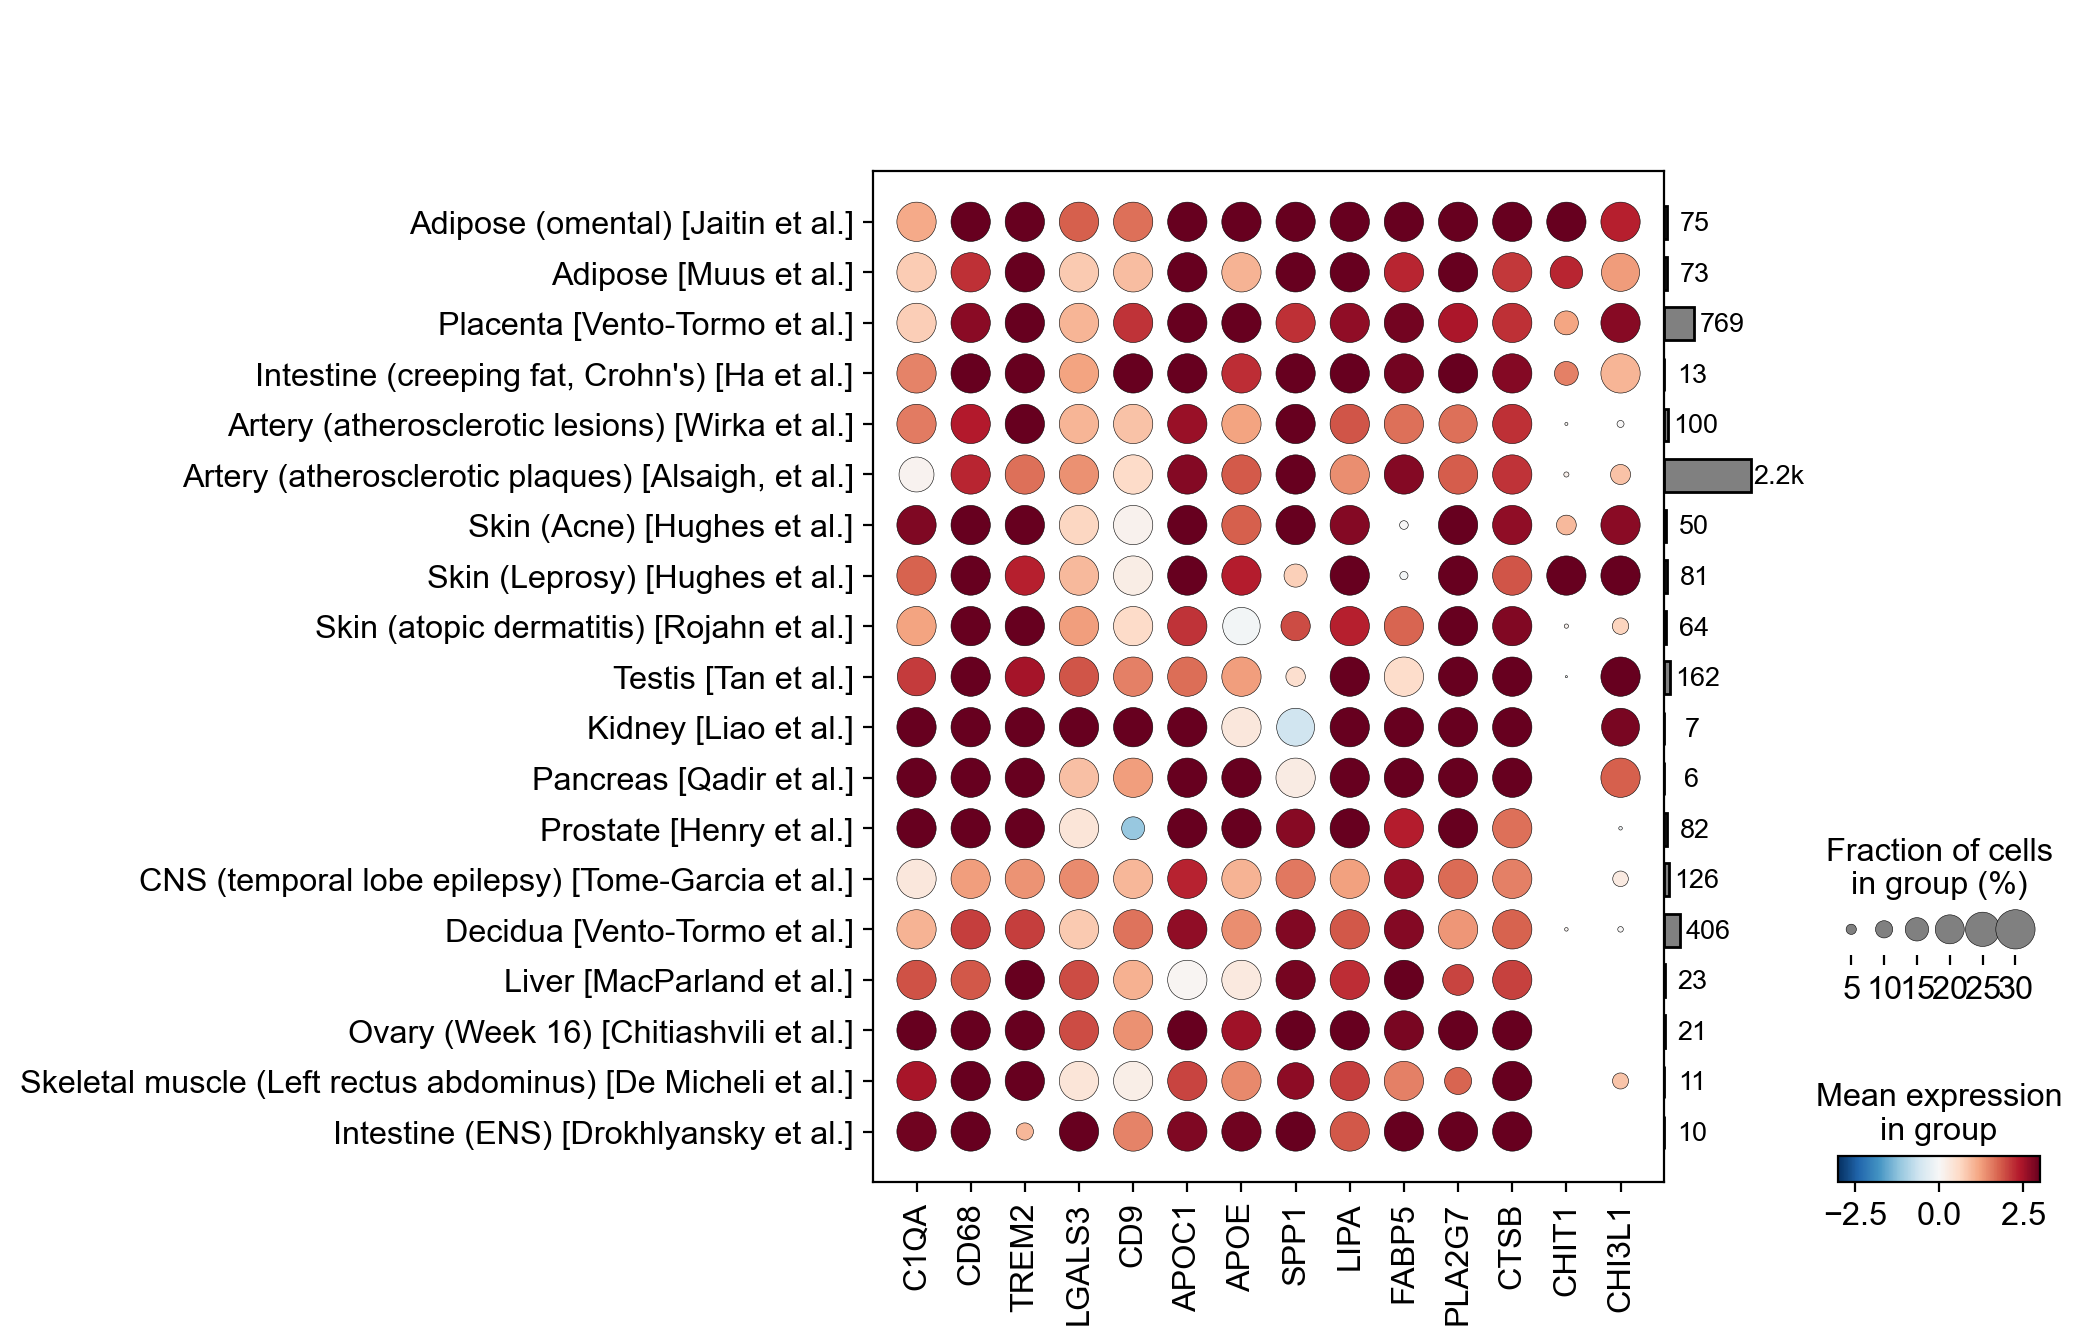

In [34]:
f = sc.pl.dotplot(small_lamdb,
                  genes, 
                  groupby=['study_desc'], return_fig=True, vmin=-3, vmax=3, cmap='RdBu_r', layer='scaled', dendrogram=False, mean_only_expressed=False, dot_max=.3,
                 )
f.add_totals(color='grey')